## Lab 13 - Clustering I: KMeans
Name: Dempsey Wade 

Class: CSCI 349 - Intro to Data Mining 

Semester: 2019SP 

Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure, adjusted_rand_score

### 1) [P] Copy the following code to build a very basic set of clustered data using the make_blobs function in sklearn.datasets.samples_generator

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=60, centers=5,cluster_std=(0.3,0.4,0.5,0.7,0.7),center_box=(0, 8), random_state=1234)

### 2) [P] Convert your data into a single pandas data frame with three variables, "x", "y", and "target". The variable "target" will represent our ground truth, i.e. the correct cluster class. Be sure it is a true categorical variable.

In [3]:
X_new = X
X = pd.DataFrame(X)
X = X.rename(columns = {0:'x', 1:'y'})
y_true = pd.DataFrame(y_true)
y_true = y_true.rename(columns = {0:'target'})

df = pd.concat([y_true, X], axis = 1)
df.head()

,target,x,y
0,1,3.920853,6.701244
1,4,7.349579,7.531876
2,3,2.415558,6.811551
3,0,1.471362,4.780079
4,3,2.536789,3.920516


In [4]:
df['target'] = df['target'].astype('category', ordered = True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3291: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


### 3) [P] Show the result of info() on these data, which should have two numeric variables, named "x" and  "y", and one category, named "target". Also show a table of the "target" variable showing the distribution of each label.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
target    60 non-null category
x         60 non-null float64
y         60 non-null float64
dtypes: category(1), float64(2)
memory usage: 1.3 KB


In [6]:
df['target'].value_counts()

4    12
3    12
2    12
1    12
0    12
Name: target, dtype: int64

### 4) [P] Create a scatterplot of the data, using the target variable to color each cluster. You should have five colored clusters.

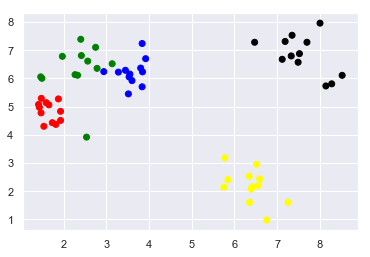

In [7]:
colorMap = {0:'red', 1:'blue', 2:'yellow', 3:'green', 4:'black'}
colors = [colorMap[i] for i in df.target]
plt.scatter(df.x, df.y, c = colors)
plt.show()

### 5) [P] Read the reference for KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Now, create a clustering using KMeans. Let's assume you have prior knowledge that there are indeed 5
clusters, but you aren't aware of ground truth. Thus, you can only assess the SSE and silhouette coefficient for
your clustering.
Print the inertia_ (SSE) and the silhouette_score results for this clustering.

In [8]:
kmeans = KMeans(n_clusters = 5, random_state = 1234).fit(X_new)
print('SSE =', kmeans.inertia_)
print('Silhouetter score =', silhouette_score(X_new, kmeans.fit_predict(df)))
#print('Silhouetter score =', silhouette_score(df, kmeans.fit_predict(df)))

SSE = 30.936618050070635
Silhouetter score = 0.7324941129540525


### 6) [P] Generate a scatterplot again, however, now color the points based off of the labels generated by the clustering. Add the centroids using a distinguishing color and size, such as black with an alpha=0.5.

In [9]:
center = pd.DataFrame(kmeans.cluster_centers_)
center = center.drop(0, axis = 1)
center = center.rename(columns = {1:'x',2:'y'})

##My 'kmeans.cluster_centers_' variable was giving 
#me a hard time so I converted it to a DataFrame

center

,x,y
0,6.380692,2.192124
1,3.593396,6.216057
2,7.592934,6.830141
3,1.655034,4.838867
4,2.342256,6.318000


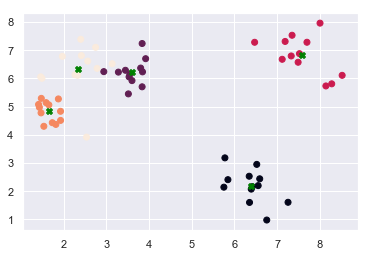

In [10]:
colorMap = {0:'red', 1:'blue', 2:'yellow', 3:'green', 4:'black'}
colors = [colorMap[i] for i in df.target]
plt.scatter(df.x, df.y, c = kmeans.labels_)
plt.scatter(center.x, center.y, marker = 'X', color = 'green') #Green is easier than black with alpha = 0.5

### 7) [P] Let's take a step backward and assume that you aren't even sure about how many clusters you have. Evaluate cluster sizes from 2 through 10. However, create a data frame that stores the SSE and the silhouette score for each k. Show the resulting data frame, and show a line plot of both on separate graphs.

In [17]:
results = pd.DataFrame({1:[1, 1]})
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1234).fit(X_new)
    sse = kmeans.inertia_
    sil = silhouette_score(X_new, kmeans.fit_predict(X_new))
    temp = pd.DataFrame({i:[sse, sil]})
    results = results.join(temp)

results = results.drop(results.columns[0], axis = 1)
results = results.T
results = results.rename(columns = {0:'SSE',1:'Silhouette'})
results

,SSE,Silhouette
2,288.379992,0.540650
3,126.495647,0.666318
4,64.391086,0.648639
5,30.936618,0.732494
6,24.624865,0.731050
7,18.972663,0.693421
8,15.786075,0.624432
9,13.245772,0.575948
10,11.871527,0.549212


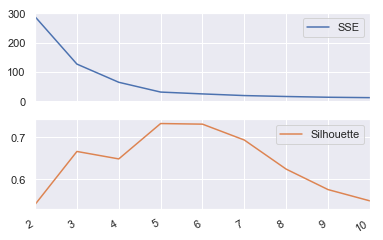

In [12]:
axes = results.plot.line(subplots=True)

### 8) [M] What does the SSE suggest is the best value of k? What about the silhouette coefficient? Why do you think there are these discrepancies? (If you have the interest, you should go back and regenerate your data with much smaller cluster_std values... and you'll see much more consistent results! That tells you something about how well these techniques work when your data are not linearly separable, and when your clusters are not all equally distributed.)

Silhouette Coefficiency suggests a k = 3. 

Because my SSE is so high for a value of k = 2, my graph is a little hard to read. From my DataFrame, as one could easily predict, the SSE continues to decrease as k gets larger. We want to find the point in the graph where the SSE levels off without there being to large of a SSE value. My dataFrame suggests a value of 5, since its SSE value is very low, even though my silhouette score off. 

For my silhouette score, k = 3 yields a 0.7, while k = 5 yields ~0.62. These values are very close, but the SSE for k = 3 and 5 are not close. Therefore my best clustering value would be anywhere from 3-5. 

### 9) [P] Re-generate your clustering for k=5. You will likely notice that your labels will be different colors than your original labels. That's annoying, but there's not much you can do about it unless you reassign your labels using a simple mapping.
Let's bring in our ground truth. Write the code to remap your cluster labels to the same labels as your ground
truth.

(HINT: How? Perhaps the easiest approach is to use the contingency_matrix function in
sklearn.metrics.cluster package. Show the output of that, then think about how you can use that to
get the best mapping.)

One you have your cluster labels remapped, then plot your data, but keep every point that has been assigned
the correct cluster label as black, and show those points that were not grouped into the correct cluster as red.

SSE = 30.936618050070635
Silhouetter score = 0.7324941129540525


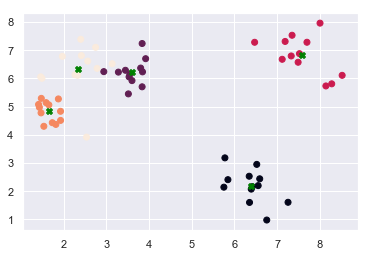

In [13]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(df)
print('SSE =', kmeans.inertia_)
print('Silhouetter score =', silhouette_score(df, kmeans.fit_predict(df)))

center = pd.DataFrame(kmeans.cluster_centers_)
center = center.drop(0, axis = 1)
center = center.rename(columns = {1:'x',2:'y'})

colorMap = {0:'red', 1:'blue', 2:'yellow', 3:'green', 4:'black'}
colors = [colorMap[i] for i in df.target]
plt.scatter(df.x, df.y, c = kmeans.labels_)
plt.scatter(center.x, center.y, marker = 'X', color = 'green')

### 10) [M] Since we do have ground truth, there are several metrics that are used to assess the quality of your clustering. Read the section on clustering performance evaluation in Scikit-learn's documentation page:
https://scikitlearn.org/stable/modules/clustering.html#clustering-evaluation

Pay close attention to the following: Adjusted Rand Index, Homogeneity, Completeness, and V-measure. In this section, very briefly describe each of these four measures. Though we did not explicitly cover them in class, these are good to know.

Adjusted Range Index- measures the similarity of two assignments.

Homogeneity- an objective for clusters in which each cluster contains only members of a single class. 

Completeness- another objective for clusters in which all members of a class are assigned to the same cluster. You can have multiple instances of completeness in one graph. 

V-measure- The mean between homogeneity and completness. 


### 11) [P] Create a new data frame that contains these four measures for all KMeans clusterings of k between 2-10. As before, show your data frame, then generate a plot for each. However, since each of these falls on the same scale, generate them on either one plot, or show them as subplots.

In [28]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import completeness_score

In [35]:
results = pd.DataFrame({1:[1, 1, 1, 1]})
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(df)
    ari = 1
    homogeneity = 1
    completeness = completeness_score(df.x, df.y)
    v = 2*(homogeneity * completeness) / (homogeneity + completeness)
    temp = pd.DataFrame({i:[ari, homogeneity, completeness, v]})
    results = results.join(temp)
    
results = results.drop(results.columns[0], axis = 1)
results = results.T
results = results.rename(columns = {0:'ARI',1:'Homogeneity',2:'Completeness',3:'Vmeasure'})
results

,ARI,Homogeneity,Completeness,Vmeasure
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0


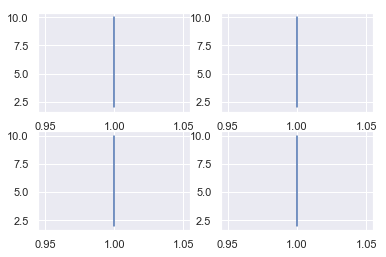

In [44]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(results.ARI, results.index)

plt.subplot(2, 2, 2)
plt.plot(results.Homogeneity, results.index)

plt.subplot(2, 2, 3)
plt.plot(results.Completeness, results.index)

plt.subplot(2, 2, 4)
plt.plot(results.Vmeasure, results.index)

plt.show()

### 12) [P] OPTIONAL – A benchmark dataset has been going around called the diamonds dataset. It's a rich dataset of 53940 rows over 10 variables. Each row represents various characteristics of diamonds. The primary motivation of these data is to challenge the machine learning community to predict the price of a diamond, based on the other 9 characteristics.

Load in the data as follows:
df_diamonds = sns.load_dataset("diamonds")

This page has good info about the variables: https://www.kaggle.com/shivam2503/diamonds

Your aim right now is to simply assess the following - are there any natural clusterings of these data? If so,
over which variables? How many clusters?

(NOTE: don't spend too much time on this yet. The next lab will repeat this question, but allow you to use
Hierarchical Agglomerative clustering to help you answer the question.)

In [33]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
